In [11]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image

In [12]:
# image = Image.open("images/elon.jpeg")
# mask = Image.open("images/mask.jpeg")
# mask2 = Image.open("images/second_mask.jpeg")

image = cv2.imread("images/cat.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170, 224, 410]]

# formats
# Pascal_voc (x_min, y_min, x_max, y_max), YOLO, COCO

In [13]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0)
    ], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048, min_visibility=0.3, label_fields=[]) # yolo # coco
)

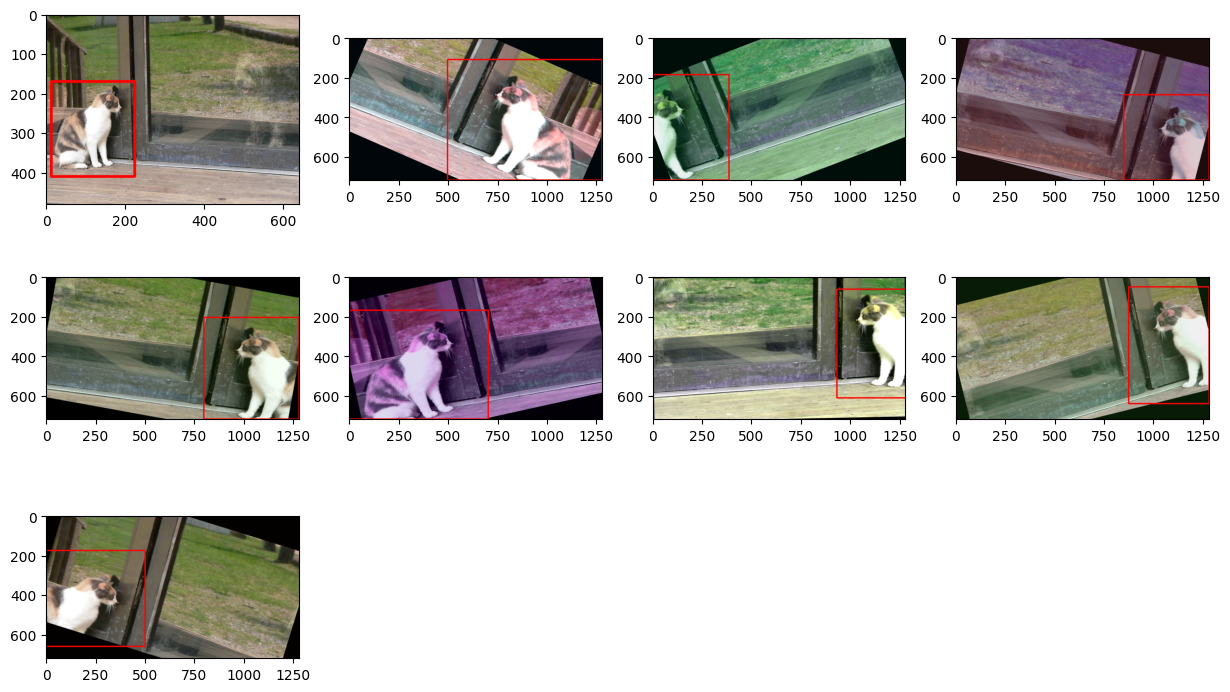

In [14]:
images_list = [image]
saved_bboxes = [bboxes[0]]
for i in range(15):
    augmentations = transform(image=image, bboxes=bboxes)
    augmented_img = augmentations["image"]

    if len(augmentations["bboxes"]) == 0:
        continue
    images_list.append(augmented_img)
    saved_bboxes.append(augmentations["bboxes"][0])
plot_examples(images_list, saved_bboxes)